<a href="https://colab.research.google.com/github/wlghksw/DeepLearningAppProject/blob/DeepLearning_Colab/Deeplearning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
cd "/content/dr"

In [ ]:
# 1. YOLOv8 라이브러리 설치
!pip install ultralytics

# 2. Google Drive 마운트
from google.colab import drive
import os

drive.mount('/content/drive')

# 3. 데이터셋 경로 설정
DATASET_ROOT = '/content/drive/MyDrive/DeepLearningAppProject-final_dataset'
YAML_OUTPUT_PATH = '/content/yolo_config' # data.yaml을 저장할 임시 경로

if not os.path.exists(DATASET_ROOT):
    print(f"ERROR: 데이터셋 경로를 찾을 수 없습니다.  {DATASET_ROOT}")
else:
    print(f"데이터셋 루트 경로 설정 완료: {DATASET_ROOT}")

os.makedirs(YAML_OUTPUT_PATH, exist_ok=True)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.6 MB/s eta 0:00:00
Mounted at /content/drive
✅ 데이터셋 루트 경로 설정 완료: /content/drive/MyDrive/DeepLearningAppProject-final_dataset


In [ ]:
from ultralytics import YOLO
import os

# 1. data.yaml 설정 파일 생성
yaml_content = f"""
# 데이터셋 루트 경로 (Drive의 전처리 폴더)
path: {DATASET_ROOT}

# 학습/검증 이미지 및 라벨 폴더 (path: 에 대한 상대 경로)
train: train
val: valid

# 클래스 개수 (현재 파손 제외: oil, scratch, stain)
nc: 3

# 클래스 이름
names: ['oil', 'scratch', 'stain']


yaml_file_name = 'defect_segmentation_data.yaml'
yaml_path = os.path.join(YAML_OUTPUT_PATH, yaml_file_name)
with open(yaml_path, 'w') as f:
    f.write(yaml_content)

print(f"\n data.yaml 파일 생성 완료: {yaml_path}")

ModuleNotFoundError: No module named 'ultralytics'

In [ ]:
# 1. YOLOv8 Segmentation 모델 로드
model = YOLO('yolov8s-seg.pt')

# 2. 모델 학습 실행 (에포크=30)
results = model.train(
    data=yaml_path,
    epochs=30,
    imgsz=640,
    batch=16,
    name='smartphone_defect_seg_30ep'
)

# 학습 결과가 저장된 폴더 경로
RUNS_DIR = '/content/runs/segment/smartphone_defect_seg_30ep'

print(f"\n학습 완료. 결과 폴더 경로: {RUNS_DIR}")

Ultralytics 8.3.229 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/yolo_config/defect_segmentation_data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=smartphone_defect_seg_30ep, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, pa

In [ ]:
from ultralytics import YOLO
import os

# 1. 학습 결과 폴더 경로 (이전 3단계에서 사용한 경로)
RUNS_DIR = '/content/runs/segment/smartphone_defect_seg_30ep'

# best.pt 모델 파일 로드
best_model_path = os.path.join(RUNS_DIR, 'weights', 'best.pt')
trained_model = YOLO(best_model_path)


DATASET_ROOT = '/content/drive/MyDrive/final_yolo_dataset'
test_image_filename = 'Scr_0043.jpg'
test_image_path = os.path.join(DATASET_ROOT, 'valid', 'images', test_image_filename)

# 경로가 존재하는지 최종 확인
if not os.path.exists(test_image_path):
    print(f"❌ 오류: 지정된 경로에 파일이 존재하지 않습니다: {test_image_path}")
    print("Google Drive에서 파일 이름을 확인하고 'test_image_filename' 변수를 수정하세요.")
else:
    print(f"✅ 테스트 이미지 경로 확인 완료: {test_image_path}")

    # TTA 적용 추론 실행 (augment=True)
    print("\n--- TTA 적용 예측 실행 (Enhanced Inference) ---")
    results_tta = trained_model.predict(
        source=test_image_path,
        save=True,
        conf=0.25,
        augment=True, # TTA 활성화
        name='tta_enhanced_inference_30ep_fix'
    )

    print("\n최종 예측 결과는 /content/runs/segment/tta_enhanced_inference_30ep_fix 폴더에 저장되었습니다.")

✅ 테스트 이미지 경로 확인 완료: /content/drive/MyDrive/final_yolo_dataset/valid/images/Scr_0043.jpg

--- TTA 적용 예측 실행 (Enhanced Inference) ---

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.
image 1/1 /content/drive/MyDrive/final_yolo_dataset/valid/images/Scr_0043.jpg: 384x640 6 oils, 16.0ms
Speed: 2.2ms preprocess, 16.0ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/runs/segment/tta_enhanced_inference_30ep_fix2

최종 예측 결과는 /content/runs/segment/tta_enhanced_inference_30ep_fix 폴더에 저장되었습니다.


In [ ]:
import os
import glob
from google.colab import drive

if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')

DATASET_ROOT = '/content/drive/MyDrive/DeepLearningAppProject-final_dataset'

# YOLO 라벨 파일이 있는 폴더 경로 (train, valid, test 모두 처리)
label_dirs = [
    os.path.join(DATASET_ROOT, 'train', 'labels'),
    os.path.join(DATASET_ROOT, 'valid', 'labels'),
    os.path.join(DATASET_ROOT, 'test', 'labels')
]

# 클래스 이름 매핑 정의 (스크래치, 오일, 스테인 3가지 클래스 기준)
CLASS_MAP = {
    'Oil': 0,
    'Scr': 1,
    'Sta': 2
}

print("--- 라벨 파일 클래스 인덱스 일괄 수정 시작 (Oil, Scr, Sta) ---")
total_modified_count = 0

def get_target_index(filename):
    """파일 이름에서 클래스 문자열을 찾아 해당 인덱스를 반환하는 함수"""
    # 파일 이름에 포함된 문자열을 순회하며 확인
    for class_str, index in CLASS_MAP.items():
        if class_str in filename:
            return index
    return None

for label_dir in label_dirs
    label_files = glob.glob(os.path.join(label_dir, '*.txt'))

    if not label_files:
        print(f"경고: {label_dir}에 라벨 파일(.txt)이 없습니다.")
        continue

    modified_in_dir = 0

    for filepath in label_files:
        filename = os.path.basename(filepath)
        modified = False
        new_content = []


        target_index = get_target_index(filename)

        if target_index is not None:
            try:
                with open(filepath, 'r') as f:
                    lines = f.readlines()
            except Exception as e:
                print(f"오류: {filepath} 파일 읽기 실패. 스킵합니다. {e}")
                continue

            for line in lines:
                parts = line.strip().split()
                if not parts or len(parts) < 2:
                    continue


                try:
                    current_index = int(parts[0])
                except ValueError:
                    new_content.append(line)
                    continue

                if current_index != target_index:
                    parts[0] = str(target_index)
                    new_content.append(' '.join(parts) + '\n')
                    modified = True
                else:
                    new_content.append(line)

            if modified:
                try:
                    with open(filepath, 'w') as f:
                        f.writelines(new_content)
                    total_modified_count += 1
                    modified_in_dir += 1
                except Exception as e:
                    print(f"오류: {filepath} 파일 쓰기 실패. 스킵합니다. {e}")

    print(f" {label_dir} 폴더에서 총 {modified_in_dir}개의 파일이 수정되었습니다.")


print(f"\n=======================================================")
print(f" 라벨 수정 완료. 전체 {total_modified_count}개의 파일이 수정되었습니다.")
print("=======================================================")

--- 라벨 파일 클래스 인덱스 일괄 수정 시작 (Oil, Scr, Sta) ---
✅ /content/drive/MyDrive/DeepLearningAppProject-final_dataset/train/labels 폴더에서 총 638개의 파일이 수정되었습니다.
✅ /content/drive/MyDrive/DeepLearningAppProject-final_dataset/valid/labels 폴더에서 총 81개의 파일이 수정되었습니다.
✅ /content/drive/MyDrive/DeepLearningAppProject-final_dataset/test/labels 폴더에서 총 81개의 파일이 수정되었습니다.

✅ 라벨 수정 완료. 전체 800개의 파일이 수정되었습니다.


In [ ]:
from ultralytics import YOLO
import os

YAML_OUTPUT_PATH = '/content/yolo_config'
yaml_file_name = 'defect_segmentation_data.yaml'
yaml_path = os.path.join(YAML_OUTPUT_PATH, yaml_file_name)
RUNS_DIR = '/content/runs/segment/smartphone_defect_seg_30ep'

# 1. YOLOv8 Segmentation 모델 로드
model = YOLO('yolov8s-seg.pt')

# 2. 모델 학습
results = model.train(
    data=yaml_path,
    epochs=30,
    imgsz=640,
    batch=16,
    name='smartphone_defect_seg_30ep_recheck'
)

print(f"\n 학습 재시작 완료. 결과 폴더 경로: {RUNS_DIR}")

Ultralytics 8.3.229 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/yolo_config/defect_segmentation_data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=smartphone_defect_seg_30ep_recheck, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=

In [ ]:
from ultralytics import YOLO
import os


YAML_OUTPUT_PATH = '/content/yolo_config'
yaml_file_name = 'defect_segmentation_data.yaml'
yaml_path = os.path.join(YAML_OUTPUT_PATH, yaml_file_name)

# 1. 모델 변경
# yolov8s-seg.pt -> yolov8s.pt (seg 제거)
model = YOLO('yolov8s.pt')

# 2. 모델 학습
results = model.train(
    data=yaml_path,
    epochs=60,
    imgsz=640,
    batch=16,
    name='smartphone_ver4_detect'
)


RUNS_DIR = '/content/runs/detect/smartphone_ver4_detect'
print(f"\n 학습 재시작 완료. 결과 폴더 경로: {RUNS_DIR}")

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/yolo_config/defect_segmentation_data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=smartphone_ver4_detect, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=1

In [ ]:
from pathlib import Path
import os, shutil

best_list = sorted(Path("/content").rglob("best.pt"), key=lambda p: p.stat().st_mtime, reverse=True)
last_list = sorted(Path("/content").rglob("last.pt"), key=lambda p: p.stat().st_mtime, reverse=True)

print("best top3:", best_list[:3])
print("last top3:", last_list[:3])

if not best_list:
    raise FileNotFoundError(" 현재 런타임 /content 안에 best.pt가 없습니다.")

src_best = best_list[0]
# best랑 같은 폴더의 last 우선
src_last = src_best.parent / "last.pt"
if not src_last.exists():
    src_last = last_list[0] if last_list else None

dst_dir = "/content/drive/MyDrive/YOLO_TRAINING_RESULTS/smartphone_ver4_detect/weights/"
os.makedirs(dst_dir, exist_ok=True)

shutil.copy2(str(src_best), dst_dir)
print(" copied best:", src_best)

if src_last:
    shutil.copy2(str(src_last), dst_dir)
    print(" copied last:", src_last)

!ls -lh /content/drive/MyDrive/YOLO_TRAINING_RESULTS/smartphone_ver4_detect/weights/


best top3: [PosixPath('/content/drive/MyDrive/YOLO_TRAINING_RESULTS/smartphone_ver3/weights/best.pt'), PosixPath('/content/drive/MyDrive/YOLO_TRAINING_RESULTS/smartphone_ver2/weights/best.pt'), PosixPath('/content/drive/MyDrive/YOLO_models/smartphone_ver4_detect/best.pt')]
last top3: [PosixPath('/content/drive/MyDrive/YOLO_TRAINING_RESULTS/smartphone_ver3/weights/last.pt'), PosixPath('/content/drive/MyDrive/YOLO_TRAINING_RESULTS/smartphone_ver2/weights/last.pt'), PosixPath('/content/drive/MyDrive/YOLO_models/smartphone_ver4_detect/last.pt')]
✅ copied best: /content/drive/MyDrive/YOLO_TRAINING_RESULTS/smartphone_ver3/weights/best.pt
✅ copied last: /content/drive/MyDrive/YOLO_TRAINING_RESULTS/smartphone_ver3/weights/last.pt
total 46M
-rw------- 1 root root 23M Nov 21 17:39 best.pt
-rw------- 1 root root 23M Nov 21 17:39 last.pt


In [ ]:
from ultralytics import YOLO
import os

# 1. 학습 결과 폴더 경로
RUNS_DIR = '/content/drive/MyDrive/YOLO_TRAINING_RESULTS/smartphone_ver3'


# best.pt 모델 파일 로드
best_model_path = os.path.join(RUNS_DIR, 'weights', 'best.pt')

if not os.path.exists(best_model_path):
    print(f" 오류: 학습된 모델 파일이 존재하지 않습니다. 경로를 확인하세요: {best_model_path}")
    # 만약 'smartphone_defect_seg_30ep' 폴더에 있다면 아래 경로를 사용해 보세요.
    best_model_path = '/content/drive/MyDrive/YOLO_TRAINING_RESULTS/smartphone_ver3/weights/best.pt'

trained_model = YOLO(best_model_path)

DATASET_ROOT = '/content/drive/MyDrive/SampleImage'
test_image_filename = 'Sample1.jpg'
test_image_path = os.path.join(DATASET_ROOT, test_image_filename)

# 경로가 존재하는지 최종 확인
if not os.path.exists(test_image_path):
    print(f"\n 오류: 지정된 경로에 파일이 존재하지 않습니다: {test_image_path}")
    print("Google Drive의 'valid/images' 폴더에서 파일 이름을 확인하고 'test_image_filename' 변수를 수정하세요.")
else:
    print(f"\n 테스트 이미지 경로 확인 완료: {test_image_path}")

    # TTA 적용 추론 실행 (augment=True)
    print("\n--- TTA 적용 예측 실행 시작 ---")
    results_tta = trained_model.predict(
        source=test_image_path,
        save=True,
        conf=0.1, # 감지 최소 확률
        augment=True, # TTA 활성화
        name='final_prediction_test'
    )

    print("\n 예측 완료.")
    print("감지 결과 이미지(Segmentation Mask)는 /content/runs/segment/final_prediction_test 폴더에 저장되었습니다.")

ModuleNotFoundError: No module named 'ultralytics'

In [ ]:
import os
import shutil
from google.colab import drive

# 1. Google Drive 마운트 확인
if not os.path.exists('/content/drive/MyDrive'):
    drive.mount('/content/drive')

# 2. Colab에 저장된 전체 학습 결과 폴더 경로
RUNS_DIR = '/content/runs/segment/smartphone_defect_seg_30ep_recheck'

# 3. 모델을 저장할 Google Drive의 목표 폴더 경로
DRIVE_SAVE_FOLDER = '/content/drive/MyDrive/YOLO_TRAINING_RESULTS/smartphone_defect_seg_30ep_recheck_FULL_BACKUP'

print(f"Colab 내 결과 폴더 경로: {RUNS_DIR}")
print(f"Drive 저장 목표 폴더: {DRIVE_SAVE_FOLDER}")

if os.path.exists(RUNS_DIR):

    if os.path.exists(DRIVE_SAVE_FOLDER):
        shutil.rmtree(DRIVE_SAVE_FOLDER)
        print("기존 백업 폴더를 삭제했습니다.")

    shutil.copytree(RUNS_DIR, DRIVE_SAVE_FOLDER)

    print("\n 전체 학습 결과 폴더 백업 성공!")
    print(f"전체 결과 폴더가 Google Drive의 다음 위치에 저장되었습니다: {DRIVE_SAVE_FOLDER}")
    print("이 폴더에는 best.pt 모델 파일, 모든 그래프 파일, 로그 등이 포함되어 있습니다.")
else:
    print("\n 오류: Colab 환경에 결과 폴더가 존재하지 않습니다. 학습이 완료되었는지 다시 확인해주세요.")

Colab 내 결과 폴더 경로: /content/runs/segment/smartphone_defect_seg_30ep_recheck
Drive 저장 목표 폴더: /content/drive/MyDrive/YOLO_TRAINING_RESULTS/smartphone_defect_seg_30ep_recheck_FULL_BACKUP

✅ 전체 학습 결과 폴더 백업 성공!
전체 결과 폴더가 Google Drive의 다음 위치에 저장되었습니다: /content/drive/MyDrive/YOLO_TRAINING_RESULTS/smartphone_defect_seg_30ep_recheck_FULL_BACKUP
이 폴더에는 best.pt 모델 파일, 모든 그래프 파일, 로그 등이 포함되어 있습니다.


In [ ]:
import os
import shutil
from google.colab import drive

# 1. Google Drive 마운트 확인
if not os.path.exists('/content/drive/MyDrive'):
    drive.mount('/content/drive')

# 2. Colab에 저장된 전체 학습 결과 폴더 경로
RUNS_DIR = '/content/runs/segment/smartphone_ver3'

# 3. 모델을 저장할 Google Drive의 목표 폴더 경로
DRIVE_SAVE_FOLDER = '/content/drive/MyDrive/YOLO_TRAINING_RESULTS/smartphone_ver3'

print(f"Colab 내 결과 폴더 경로: {RUNS_DIR}")
print(f"Drive 저장 목표 폴더: {DRIVE_SAVE_FOLDER}")

# 4. 복사 실행
if os.path.exists(RUNS_DIR):
    if os.path.exists(DRIVE_SAVE_FOLDER):
        shutil.rmtree(DRIVE_SAVE_FOLDER)
        print("기존 백업 폴더를 삭제했습니다.")

    shutil.copytree(RUNS_DIR, DRIVE_SAVE_FOLDER)

    print("\n 전체 학습 결과 폴더 백업 성공!")
    print(f"전체 결과 폴더가 Google Drive의 다음 위치에 저장되었습니다: {DRIVE_SAVE_FOLDER}")
    print("이 폴더에는 best.pt 모델 파일, 모든 그래프 파일, 로그 등이 포함되어 있습니다.")
else:
    print("\n 오류: Colab 환경에 결과 폴더가 존재하지 않습니다. 학습이 완료되었는지 다시 확인해주세요.")

Colab 내 결과 폴더 경로: /content/runs/segment/smartphone_ver3
Drive 저장 목표 폴더: /content/drive/MyDrive/YOLO_TRAINING_RESULTS/smartphone_ver3

✅ 전체 학습 결과 폴더 백업 성공!
전체 결과 폴더가 Google Drive의 다음 위치에 저장되었습니다: /content/drive/MyDrive/YOLO_TRAINING_RESULTS/smartphone_ver3
이 폴더에는 best.pt 모델 파일, 모든 그래프 파일, 로그 등이 포함되어 있습니다.


In [ ]:
from ultralytics import YOLO
import os

YAML_OUTPUT_PATH = '/content/yolo_config'
yaml_file_name = 'defect_segmentation_data.yaml'
yaml_path = os.path.join(YAML_OUTPUT_PATH, yaml_file_name)
RUNS_DIR = '/content/runs/segment/smartphone_ver3'

# 1. YOLOv8 Segmentation 모델 로드
model = YOLO('yolov8s-seg.pt')

# 2. 모델 학습
results = model.train(
    data=yaml_path,
    epochs=60,
    imgsz=640,
    batch=16,
    name='smartphone_ver3'
)

print(f"\n 학습 재시작 완료. 결과 폴더 경로: {RUNS_DIR}")

Ultralytics 8.3.229 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/yolo_config/defect_segmentation_data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=smartphone_ver3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100,

In [ ]:
from ultralytics import YOLO
import os

# 1. 저장된 best.pt 모델 경로
MODEL_PATH = '/content/drive/MyDrive/YOLO_TRAINING_RESULTS/smartphone_ver4_detect/weights/best.pt'

# 2. 데이터셋 설정 파일 경로
YAML_PATH = '/content/yolo_config/defect_segmentation_data.yaml'

if os.path.exists(MODEL_PATH):
    print(f"♻️ Loading model from {MODEL_PATH}...")
    model = YOLO(MODEL_PATH)

    metrics = model.val(
        data=YAML_PATH,
        project='/content/drive/MyDrive/YOLO_TRAINING_RESULTS',
        name='smartphone_ver4_reval_results',
        plots=True
    )

    print("\n 검증 완료! 새로운 결과 그래프들이 아래 경로에 생성되었습니다:")
    print("/content/drive/MyDrive/YOLO_TRAINING_RESULTS/smartphone_ver4_reval_results")
else:
    print(" best.pt 모델 파일도 찾을 수 없습니다. 경로를 확인해주세요.")

ModuleNotFoundError: No module named 'ultralytics'

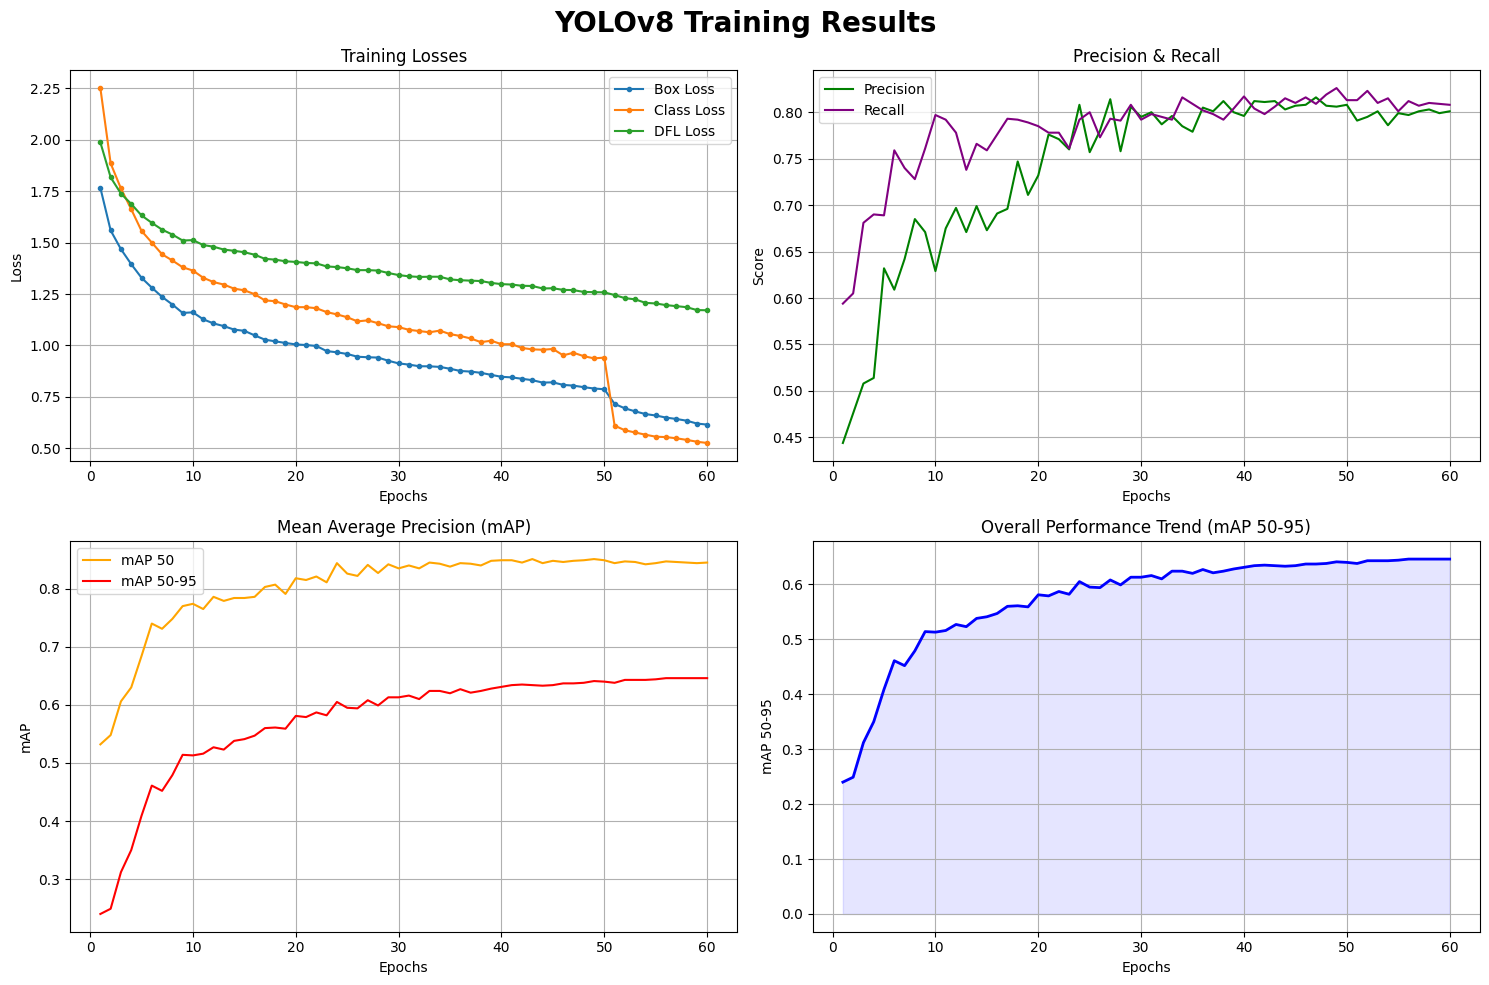

In [ ]:
import matplotlib.pyplot as plt
import re


log_text = """
1/60      7.31G      1.766      2.251      1.987
all       1444       3291      0.444      0.594      0.532       0.24
2/60      7.38G      1.559      1.885      1.817
all       1444       3291      0.476      0.605      0.548      0.249
3/60      7.03G      1.468      1.763      1.738
all       1444       3291      0.508      0.681      0.606      0.312
4/60      7.06G      1.395      1.662      1.688
all       1444       3291      0.514       0.69       0.63       0.35
5/60      7.06G      1.329      1.557      1.632
all       1444       3291      0.632      0.689      0.684      0.409
6/60      7.06G      1.281        1.5      1.596
all       1444       3291      0.609      0.759       0.74      0.461
7/60      7.06G      1.236      1.443      1.563
all       1444       3291      0.642       0.74      0.731      0.452
8/60      7.06G      1.199      1.413      1.539
all       1444       3291      0.685      0.728      0.748      0.479
9/60      7.06G      1.158       1.38       1.51
all       1444       3291      0.671      0.761       0.77      0.514
10/60      7.06G      1.161      1.364      1.512
all       1444       3291      0.629      0.797      0.774      0.513
11/60      7.06G      1.127      1.329      1.488
all       1444       3291      0.675      0.792      0.765      0.516
12/60      7.06G      1.107      1.308       1.48
all       1444       3291      0.697      0.778      0.786      0.527
13/60      7.06G      1.094      1.296      1.466
all       1444       3291      0.671      0.738      0.779      0.523
14/60      7.06G      1.077      1.276       1.46
all       1444       3291      0.699      0.766      0.784      0.538
15/60      7.06G      1.071      1.268      1.453
all       1444       3291      0.673      0.759      0.784      0.541
16/60      7.06G      1.049      1.249      1.441
all       1444       3291      0.691      0.776      0.786      0.547
17/60      7.06G      1.028      1.219      1.421
all       1444       3291      0.696      0.793      0.803       0.56
18/60      7.06G       1.02      1.215      1.417
all       1444       3291      0.747      0.792      0.807      0.561
19/60      7.06G      1.012      1.199      1.409
all       1444       3291      0.711      0.789      0.791      0.559
20/60      7.06G      1.005      1.186      1.406
all       1444       3291      0.732      0.785      0.818      0.581
21/60      7.06G      1.002      1.186      1.401
all       1444       3291      0.776      0.778      0.815      0.579
22/60      7.06G     0.9975      1.181      1.399
all       1444       3291      0.771      0.778      0.821      0.587
23/60       7.1G     0.9725      1.162      1.384
all       1444       3291       0.76      0.761      0.811      0.582
24/60       7.1G     0.9667      1.151      1.381
all       1444       3291      0.808      0.792      0.844      0.605
25/60       7.1G     0.9585      1.137      1.375
all       1444       3291      0.757        0.8      0.826      0.595
26/60       7.1G     0.9451      1.117      1.366
all       1444       3291       0.78      0.773      0.822      0.594
27/60       7.1G     0.9426      1.122      1.366
all       1444       3291      0.814      0.793      0.841      0.608
28/60       7.1G      0.941      1.108      1.364
all       1444       3291      0.758      0.791      0.827      0.599
29/60      7.13G     0.9255      1.093      1.352
all       1444       3291      0.806      0.808      0.842      0.613
30/60       7.2G     0.9127      1.089      1.342
all       1444       3291      0.795      0.792      0.835      0.613
31/60      7.27G     0.9068      1.076      1.336
all       1444       3291        0.8      0.798       0.84      0.616
32/60      7.27G     0.8989       1.07      1.333
all       1444       3291      0.787      0.795      0.835       0.61
33/60      7.27G     0.8985      1.064      1.334
all       1444       3291      0.796      0.792      0.845      0.624
34/60      7.27G     0.8957      1.072      1.334
all       1444       3291      0.785      0.816      0.843      0.624
35/60      7.27G     0.8866      1.055      1.321
all       1444       3291      0.779      0.809      0.838       0.62
36/60      7.27G     0.8759      1.046      1.317
all       1444       3291      0.805      0.802      0.844      0.627
37/60      7.27G     0.8729      1.034      1.315
all       1444       3291      0.801      0.798      0.843      0.621
38/60      7.27G     0.8669      1.016      1.313
all       1444       3291      0.812      0.792       0.84      0.624
39/60      7.27G      0.857      1.023      1.304
all       1444       3291        0.8      0.804      0.848      0.628
40/60      7.27G     0.8476      1.006      1.298
all       1444       3291      0.796      0.817      0.849      0.631
41/60      7.27G     0.8447      1.006      1.296
all       1444       3291      0.812      0.804      0.849      0.634
42/60      7.27G     0.8379     0.9876       1.29
all       1444       3291      0.811      0.798      0.845      0.635
43/60      7.27G     0.8312      0.981      1.289
all       1444       3291      0.812      0.806      0.851      0.634
44/60      7.27G     0.8195     0.9791      1.277
all       1444       3291      0.803      0.815      0.844      0.633
45/60      7.27G     0.8206     0.9828      1.278
all       1444       3291      0.807       0.81      0.848      0.634
46/60      7.27G     0.8082      0.952       1.27
all       1444       3291      0.808      0.816      0.846      0.637
47/60      7.27G     0.8047     0.9644      1.269
all       1444       3291      0.816      0.809      0.848      0.637
48/60      7.27G     0.7971     0.9479       1.26
all       1444       3291      0.807      0.819      0.849      0.638
49/60      7.27G     0.7907     0.9372      1.259
all       1444       3291      0.806      0.826      0.851      0.641
50/60      7.27G      0.787     0.9408      1.258
all       1444       3291      0.808      0.813      0.849       0.64
51/60      7.34G     0.7158     0.6103      1.245
all       1444       3291      0.791      0.813      0.844      0.638
52/60      7.38G     0.6943     0.5876       1.23
all       1444       3291      0.795      0.823      0.847      0.643
53/60      7.06G     0.6796     0.5769      1.224
all       1444       3291      0.801       0.81      0.846      0.643
54/60      7.08G     0.6664     0.5661      1.207
all       1444       3291      0.786      0.815      0.842      0.643
55/60      7.08G     0.6595     0.5564      1.204
all       1444       3291      0.799      0.801      0.844      0.644
56/60      7.08G     0.6493     0.5545      1.196
all       1444       3291      0.797      0.812      0.847      0.646
57/60      7.15G     0.6426     0.5487      1.191
all       1444       3291      0.801      0.807      0.846      0.646
58/60      7.22G     0.6342      0.541      1.186
all       1444       3291      0.803       0.81      0.845      0.646
59/60      7.22G     0.6204      0.532      1.172
all       1444       3291      0.799      0.809      0.844      0.646
60/60      7.22G     0.6152     0.5259      1.171
all       1444       3291      0.801      0.808      0.845      0.646
"""

# 2. 데이터 파싱 (정규표현식 사용)
epochs = []
box_loss = []
cls_loss = []
dfl_loss = []
precision = []
recall = []
map50 = []
map50_95 = []

# 줄 단위로 읽기
lines = log_text.strip().split('\n')

for i in range(0, len(lines), 2): # 두 줄씩 처리 (학습 로그 행 + 검증 결과 행)
    if i+1 >= len(lines): break

    train_line = lines[i].strip()
    val_line = lines[i+1].strip()

    # 학습 로그 파싱 (Epoch, GPU, Box, Cls, DFL ...)
    # 예: 1/60 7.31G 1.766 2.251 1.987
    t_parts = re.split(r'\s+', train_line)
    if '/' in t_parts[0]:
        ep = int(t_parts[0].split('/')[0])
        epochs.append(ep)
        # 3번째, 4번째, 5번째 값이 각각 box, cls, dfl loss
        box_loss.append(float(t_parts[2]))
        cls_loss.append(float(t_parts[3]))
        dfl_loss.append(float(t_parts[4]))

    # 검증 로그 파싱 (all Instances Size P R mAP50 mAP50-95)
    # 예: all 1444 3291 0.444 0.594 0.532 0.24
    v_parts = re.split(r'\s+', val_line)
    if v_parts[0] == 'all':
        # 뒤에서부터 4개를 가져옴 (P, R, mAP50, mAP95)
        precision.append(float(v_parts[-4]))
        recall.append(float(v_parts[-3]))
        map50.append(float(v_parts[-2]))
        map50_95.append(float(v_parts[-1]))

# 3. 그래프 그리기
plt.figure(figsize=(15, 10))
plt.suptitle('YOLOv8 Training Results', fontsize=20, fontweight='bold')

# Subplot 1: Losses
plt.subplot(2, 2, 1)
plt.plot(epochs, box_loss, label='Box Loss', marker='.')
plt.plot(epochs, cls_loss, label='Class Loss', marker='.')
plt.plot(epochs, dfl_loss, label='DFL Loss', marker='.')
plt.title('Training Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Subplot 2: Precision & Recall
plt.subplot(2, 2, 2)
plt.plot(epochs, precision, label='Precision', color='green')
plt.plot(epochs, recall, label='Recall', color='purple')
plt.title('Precision & Recall')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.legend()
plt.grid(True)

# Subplot 3: mAP
plt.subplot(2, 2, 3)
plt.plot(epochs, map50, label='mAP 50', color='orange')
plt.plot(epochs, map50_95, label='mAP 50-95', color='red')
plt.title('Mean Average Precision (mAP)')
plt.xlabel('Epochs')
plt.ylabel('mAP')
plt.legend()
plt.grid(True)

# Subplot 4: Summary (mAP50-95 Trend)
plt.subplot(2, 2, 4)
plt.plot(epochs, map50_95, label='mAP 50-95', color='blue', linewidth=2)
plt.fill_between(epochs, map50_95, color='blue', alpha=0.1)
plt.title('Overall Performance Trend (mAP 50-95)')
plt.xlabel('Epochs')
plt.ylabel('mAP 50-95')
plt.grid(True)

plt.tight_layout()
plt.show()